In [1]:
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    for gpu in gpus:
        print("Found a GPU with the name:", gpu)
else:
    print("Failed to detect a GPU.")


Found a GPU with the name: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,ReLU
from keras.callbacks import EarlyStopping
from keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [3]:
!pip install opencv-python

In [4]:
#DATA AUGUEMENTATION
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,  
                                   zoom_range=0.2, horizontal_flip=True,
                                   validation_split=0.2) 
  
test_datagen = ImageDataGenerator(rescale=1. / 255, 
                                  validation_split=0.2) 

train_data=keras.preprocessing.image_dataset_from_directory(
    directory=r"C:\Users\aashutosh kumar\Music\flowers",
    labels="inferred",
    image_size=(150,150),
    label_mode="int",
    batch_size=50,
    validation_split=0.2,
    subset="training",
    seed=123
)

val_data=keras.preprocessing.image_dataset_from_directory(
    directory=r"C:\Users\aashutosh kumar\Music\flowers",
    labels="inferred",
    label_mode="int",
    image_size=(150,150),
    batch_size=50,
    validation_split=0.2,
    subset="validation",
    seed=123
    
)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [5]:
for images, labels in train_data.take(1):
    print(images.shape)  # Should print (batch_size, 150, 150, 3)
    
for images, labels in val_data.take(1):
    print(images.shape)
    

(50, 150, 150, 3)
(50, 150, 150, 3)


In [6]:
classes=os.listdir(r"C:\Users\aashutosh kumar\Music\flowers")
classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

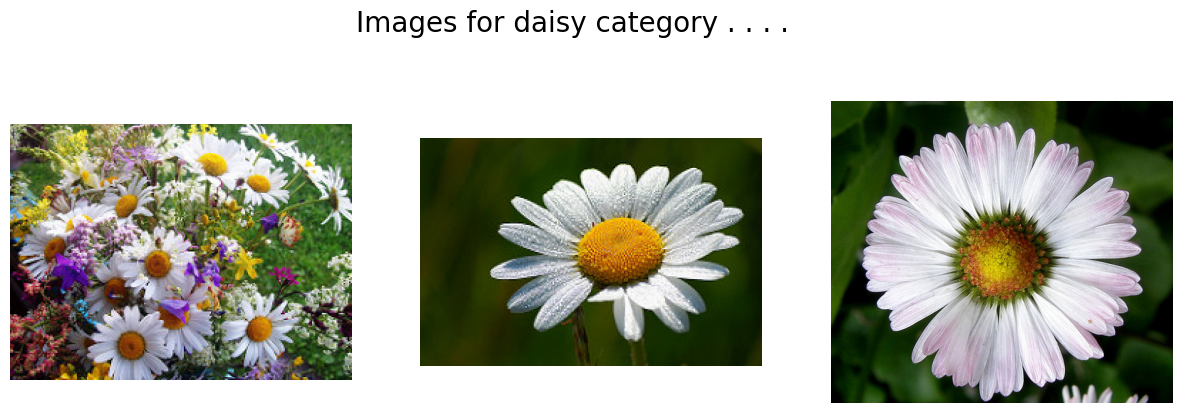

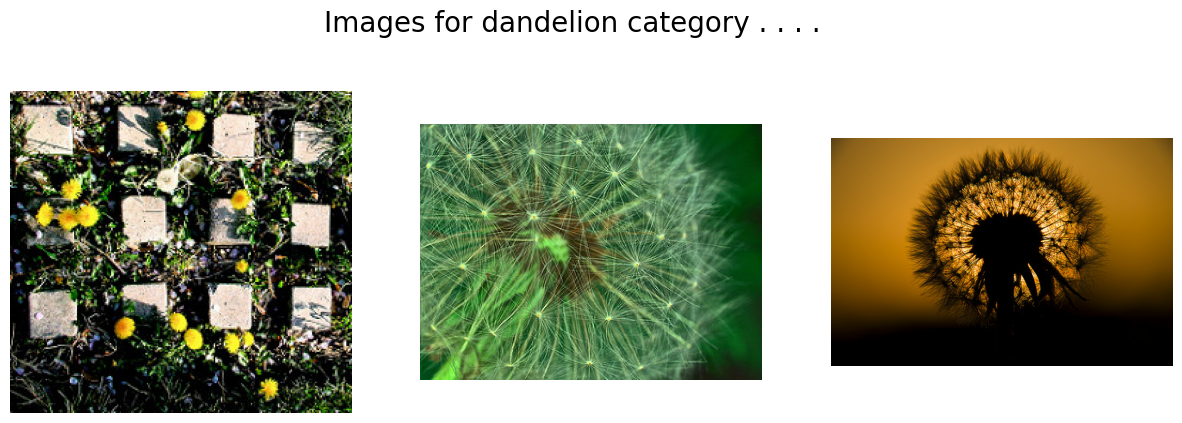

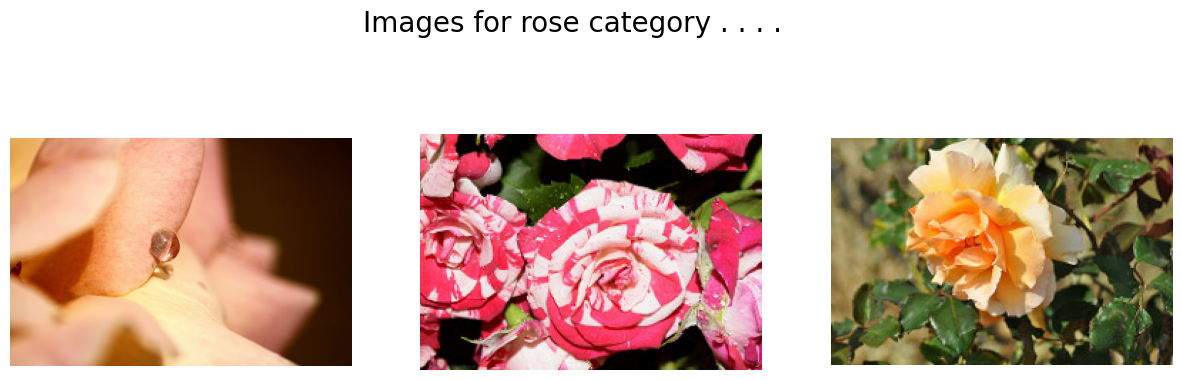

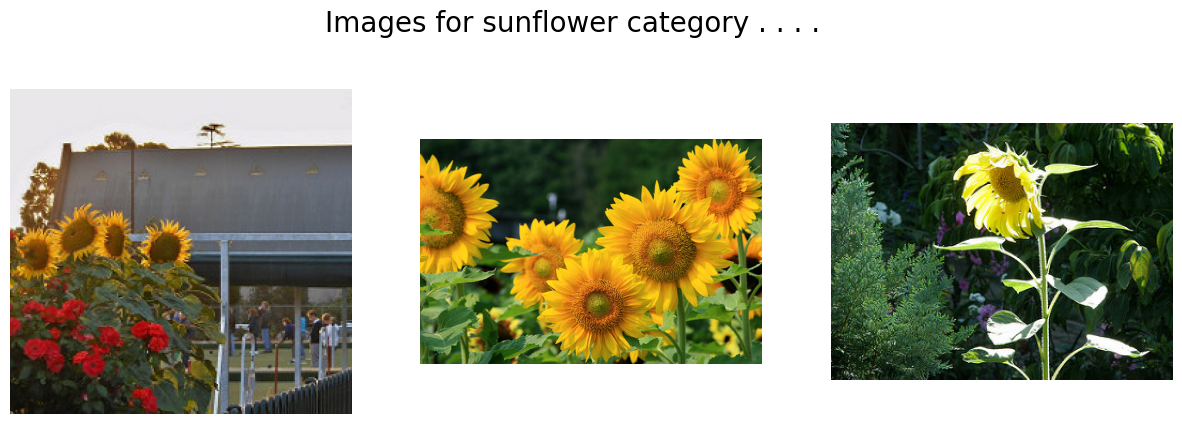

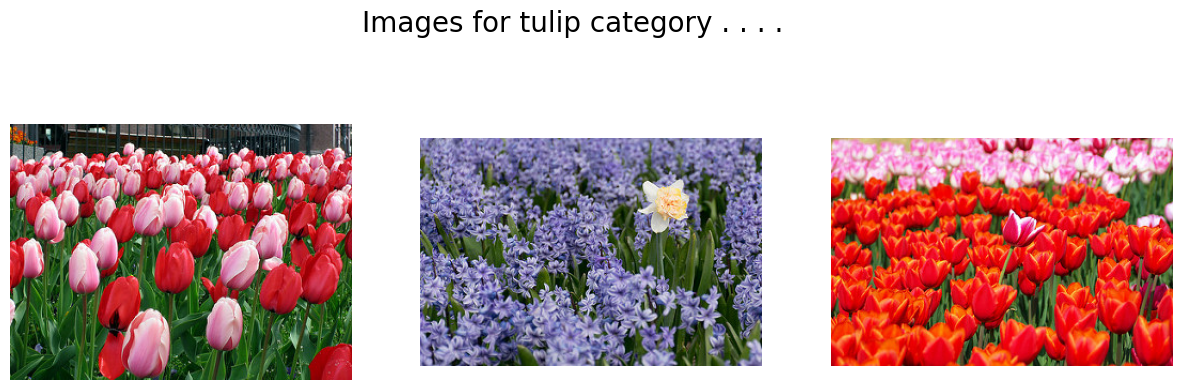

In [10]:
path = r"C:\Users\aashutosh kumar\Music\flowers"
classes = os.listdir(path)

for i in classes:
    img_p = os.path.join(path, i)
    images = os.listdir(img_p)
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Images for {i} category . . . .', fontsize=20) 
    
    # Ensure that only 3 images are displayed per class
    for j in range(3):
        k = np.random.randint(0, len(images))
        img_path = os.path.join(img_p, images[k])
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            ax[j].imshow(img)
            ax[j].axis('off')  # Hide the axes
        else:
            print(f"Image {img_path} could not be read.")

plt.show()


In [11]:
conv_base=VGG16(include_top=False,weights="imagenet",input_shape=(150,150,3))

In [12]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [13]:
def normalize_(image,label):
    image=tf.cast(image/255.,tf.float32)
    return image,label

train_data=train_data.map(normalize_)
val_data=val_data.map(normalize_)

In [14]:
conv_base.trainable=False
model=Sequential()

model.add(conv_base)
model.add(Flatten())

model.add(Dense(units=126,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=32,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=5,activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 126)               1032318   
                                                                 
 dropout (Dropout)           (None, 126)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8128      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2

In [16]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [17]:
m=model.fit(train_data,epochs=35,validation_data=val_data)

Epoch 1/35
70/70 [==============================] - 29s 259ms/step - loss: 1.5960 - accuracy: 0.3025 - val_loss: 1.4048 - val_accuracy: 0.5365
Epoch 2/35
70/70 [==============================] - 15s 212ms/step - loss: 1.3841 - accuracy: 0.4351 - val_loss: 1.2542 - val_accuracy: 0.5829
Epoch 3/35
70/70 [==============================] - 16s 223ms/step - loss: 1.2636 - accuracy: 0.5081 - val_loss: 1.1712 - val_accuracy: 0.6002
Epoch 4/35
70/70 [==============================] - 17s 245ms/step - loss: 1.1994 - accuracy: 0.5353 - val_loss: 1.0578 - val_accuracy: 0.6616
Epoch 5/35
70/70 [==============================] - 19s 271ms/step - loss: 1.1329 - accuracy: 0.5759 - val_loss: 0.9901 - val_accuracy: 0.7092
Epoch 6/35
70/70 [==============================] - 19s 273ms/step - loss: 1.0488 - accuracy: 0.6048 - val_loss: 0.8942 - val_accuracy: 0.7393
Epoch 7/35
70/70 [==============================] - 21s 294ms/step - loss: 1.0179 - accuracy: 0.6123 - val_loss: 0.8696 - val_accuracy: 0.7404

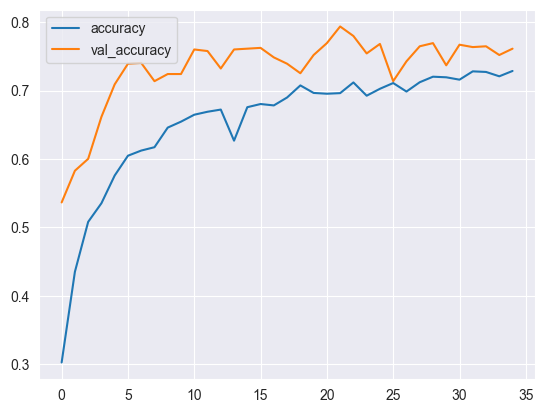

In [18]:
sns.set_style("darkgrid")
plt.plot(m.history["accuracy"])
plt.plot(m.history["val_accuracy"])
plt.legend(["accuracy","val_accuracy"])

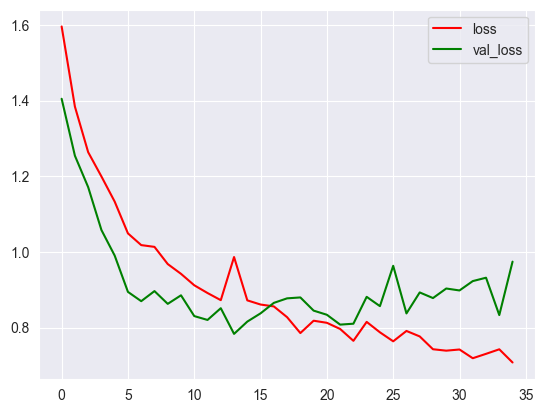

In [21]:
sns.set_style("darkgrid")
plt.plot(m.history["loss"],color="red")
plt.plot(m.history["val_loss"],color="green")
plt.legend(["loss","val_loss"])